# Txt-to-Img https://huggingface.co/docs/diffusers/main/en/api/pipelines/kandinsky3

In [1]:
from diffusers import AutoPipelineForText2Image,AutoPipelineForImage2Image
import torch
from diffusers.utils import make_image_grid, load_image

/opt/conda/envs/torch_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
pipe = AutoPipelineForImage2Image.from_pretrained(
    "kandinsky-community/kandinsky-3", variant="fp16", torch_dtype=torch.float16
)
pipe.enable_model_cpu_offload()
#pipe.unet = torch.compile(pipe.unet, mode="reduce-overhead", fullgraph=True)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:52<00:00,  7.48s/it]


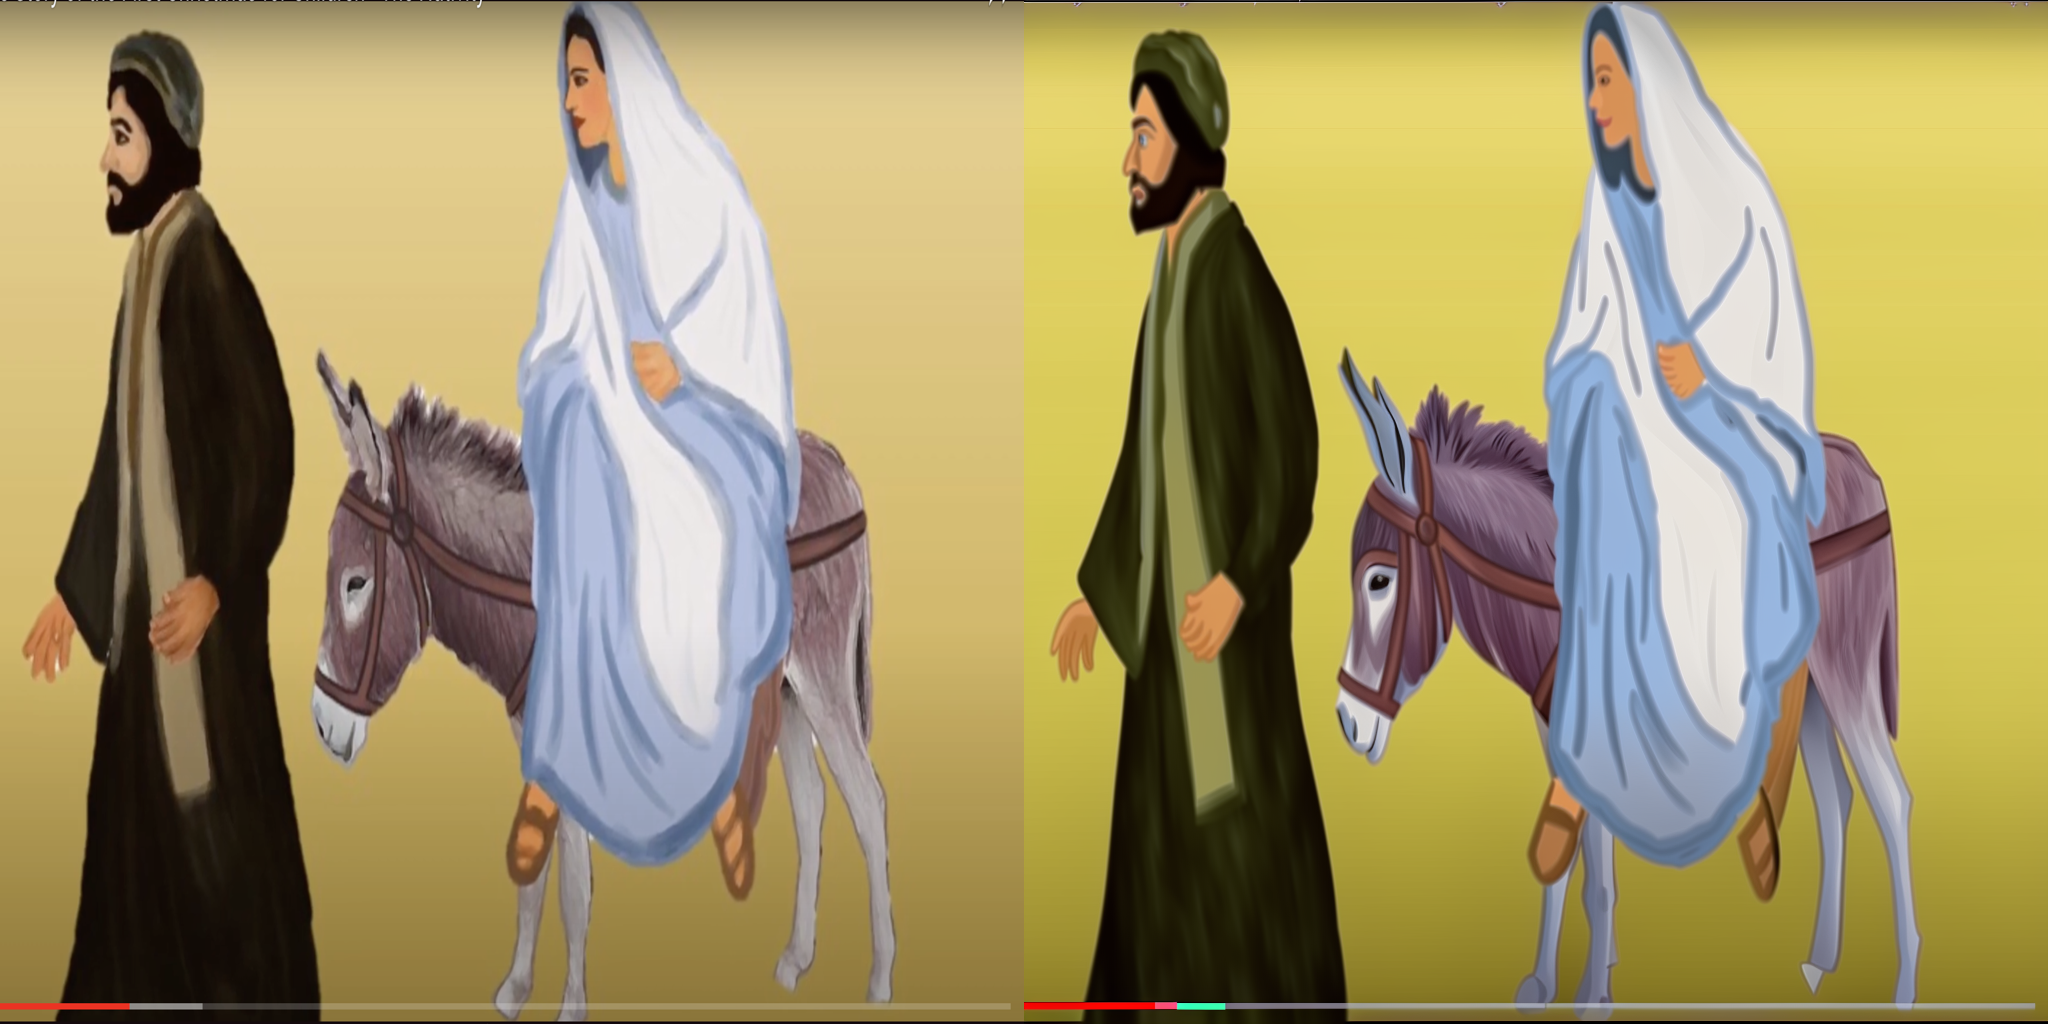

In [3]:
# import torch._dynamo
# torch._dynamo.config.suppress_errors = True
#prompt = "A photograph of the inside of a subway train. There are raccoons sitting on the seats. One of them is reading a newspaper. The window shows the city in the background."
# prompt = "A photograph of a crib filled with Haystacks. There is a baby wrapped in swaddling clothes sleeping in the crib. This crib is in a village in jerusalem"
# generator = torch.Generator(device="cuda").manual_seed(10)

init_image = load_image("JM.png").resize((1024, 1024))
prompt = """A fantasy landscape.Cartoon"""
negative_prompt = "ugly, deformed, disfigured, poor details, bad anatomy"
generator = torch.Generator(device="cuda").manual_seed(10)

#gen_image = pipe(prompt, num_inference_steps=25, generator=generator).images[0]
gen_image = pipe(prompt, image=init_image, negative_prompt=negative_prompt,strength=0.3, num_inference_steps=25).images[0]
make_image_grid([init_image, gen_image], rows=1, cols=2)

In [7]:
# image.save("image.png")
# from PIL import Image
# from IPython.display import display
# img = Image.open('image.png')
# display(img)

In [2]:
import torch
from diffusers import AutoPipelineForImage2Image, AutoPipelineForText2Image
from diffusers.utils import load_image, make_image_grid

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16, use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
#pipeline.enable_xformers_memory_efficient_attention()

Loading pipeline components...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  3.92it/s]
